The aim of this project is to  predict the quality of the wine by using the given data.

This project is helpful to consumers, which can find the quality of wine by themselves.

This project is a classification related project. So here we are using classification algorithm.

#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

#### Read the data file as data

In [2]:
data=pd.read_csv("winequalityN.csv")

Print the first 3 data

In [3]:
data.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


Check the row and column

In [4]:
print("The length of the data set is" ,len(data))
print(data.shape)
print(data.columns)



The length of the data set is 6497
(6497, 13)
Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


Find numerical column

In [5]:
data.select_dtypes(np.number).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Find Object column

In [6]:
data.select_dtypes(np.object_).columns

Index(['type'], dtype='object')

Take the graphical representation of each columns

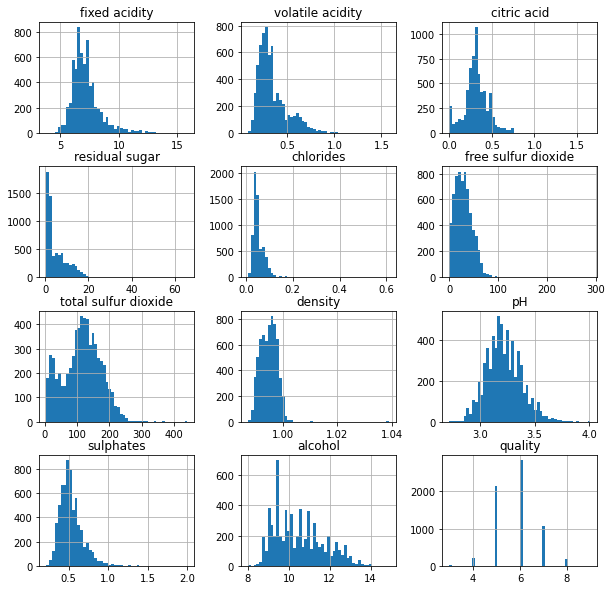

In [7]:
data.hist(bins=50,figsize=(10,10))
plt.show()

Check the null values

In [8]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Fill the null valuse by using mean and median

In [9]:
data["pH"]=data["pH"].fillna(data["pH"].mean())
data["fixed acidity"]=data["fixed acidity"].fillna(data["fixed acidity"].mean())
data["volatile acidity"]=data["volatile acidity"].fillna(data["volatile acidity"].mean())
data["citric acid"]=data["citric acid"].fillna(data["citric acid"].mean())
data["residual sugar"]=data["residual sugar"].fillna(data["residual sugar"].median())
data["chlorides"]=data["chlorides"].fillna(data["chlorides"].mean())
data["sulphates"]=data["sulphates"].fillna(data["sulphates"].mean())

Convert object columns to numerical columns

In [10]:
data["type_white"]=pd.get_dummies(data["type"],drop_first=True,dtype=int)
data.drop("type",axis=1,inplace=True)

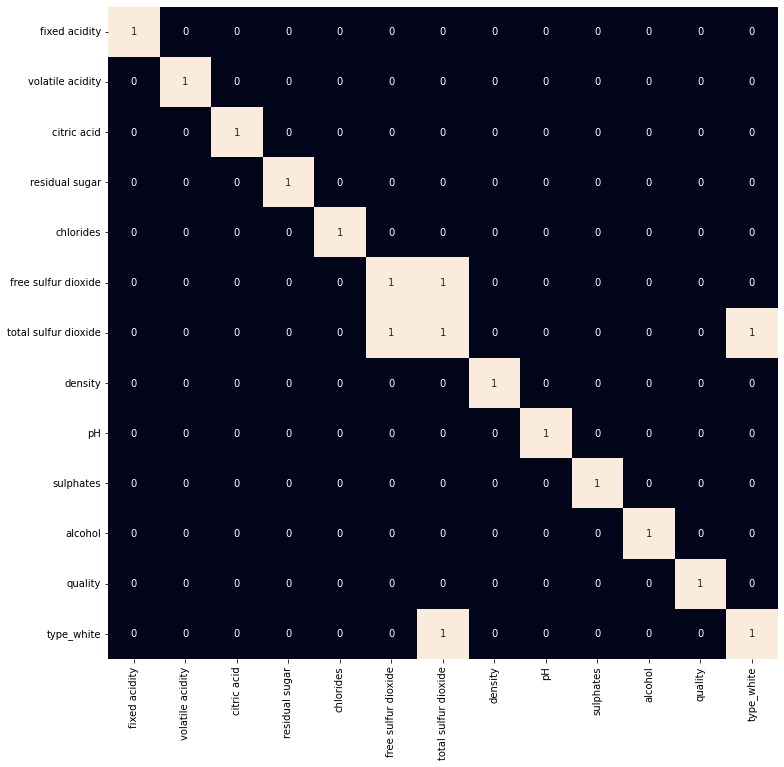

In [11]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

From the above heat map we can conclude that the ‘total sulphur dioxide’ and ‘free sulphur dioxide‘ are highly correlated features so, we will remove them.

In [12]:
data = data.drop('total sulfur dioxide', axis=1)

Split data as as x and y

In [13]:
X=data.drop("quality",axis=1)
y=data["quality"]

Convert X and y in to X_train,y_train,X_test,y_test

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [15]:
print(len(X_train))
print(len(X_test))

4547
1950


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


#### Apply All Classification Algorithmns

In [19]:
#Algorithms
lr_clf=LogisticRegression()
df_clf=DecisionTreeClassifier()
rf_clf=RandomForestClassifier()
adboost_clf=AdaBoostClassifier()
grad_clf=GradientBoostingClassifier()
svc_clf=SVC()
knn_clf=KNeighborsClassifier()
nb_clf=GaussianNB()

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
from sklearn import metrics

In [25]:
models = [lr_clf, df_clf, rf_clf,adboost_clf,grad_clf,svc_clf,knn_clf,nb_clf ]

for i in range(3):
	models[i].fit(X_train_scaled, y_train)

	print(f'{models[i]} : ')
	print('Training Accuracy : ', metrics.roc_auc_score(y_train, models[i].predict(X_train_scaled)))
	print('Validation Accuracy : ', metrics.roc_auc_score(y_test, models[i].predict(X_test_scaled)))
	print()


LogisticRegression() : 


ValueError: multi_class must be in ('ovo', 'ovr')

In [22]:
for clf in (lr_clf,df_clf,rf_clf,adboost_clf,grad_clf,svc_clf,knn_clf,nb_clf):
    clf.fit(X_train_scaled,y_train)
    y_pred=clf.predict(X_test_scaled)
    print(clf.__class__.__name__,clf.score(X_train_scaled,y_train))
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

    print("===========================")

LogisticRegression 0.5520123158126237
LogisticRegression 0.5148717948717949
DecisionTreeClassifier 1.0
DecisionTreeClassifier 0.538974358974359
RandomForestClassifier 1.0
RandomForestClassifier 0.6641025641025641
AdaBoostClassifier 0.3738728832197053
AdaBoostClassifier 0.36615384615384616
GradientBoostingClassifier 0.7061798988343964
GradientBoostingClassifier 0.5671794871794872
SVC 0.608972949197273
SVC 0.5487179487179488
KNeighborsClassifier 0.7035407961293161
KNeighborsClassifier 0.5456410256410257
GaussianNB 0.44051022652298216
GaussianNB 0.4441025641025641
